<a href="https://colab.research.google.com/github/AfifahNofa/PCVK_Ganjil_2022/blob/main/Modul11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Nama     : Afifah Nofa Kurnia Rahmadani**
##**Nim      : 2141720103**
##**No.Absen : 03**
##**Kelas    : TI-3B**


#**MODUL11-MetodeDeteksiObjek:TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.


##**Object Detection**
Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [6]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


##**Template Matching**

menggunakan library openCV:
cv.matchTemplate(), dengan parameter:
- image:citra input
- templ:template yang dicari, ukuranya tidak boleh lebih besar dari citra input
- method:metode dari template matching

Jenis metode template matching di OpenCV
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCOR
4. TM_CCOR_NORMED
5. TM_CCOEF
6. TM_CCOFF_NORMED

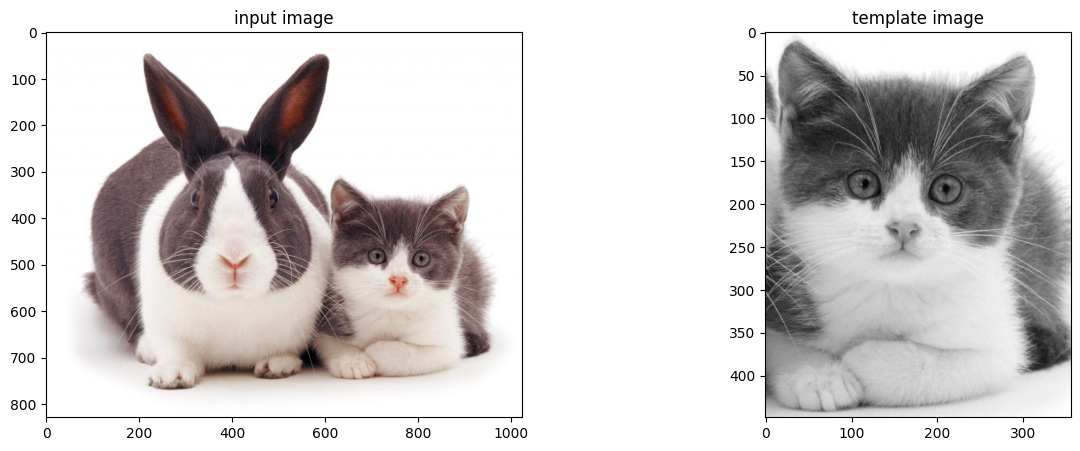

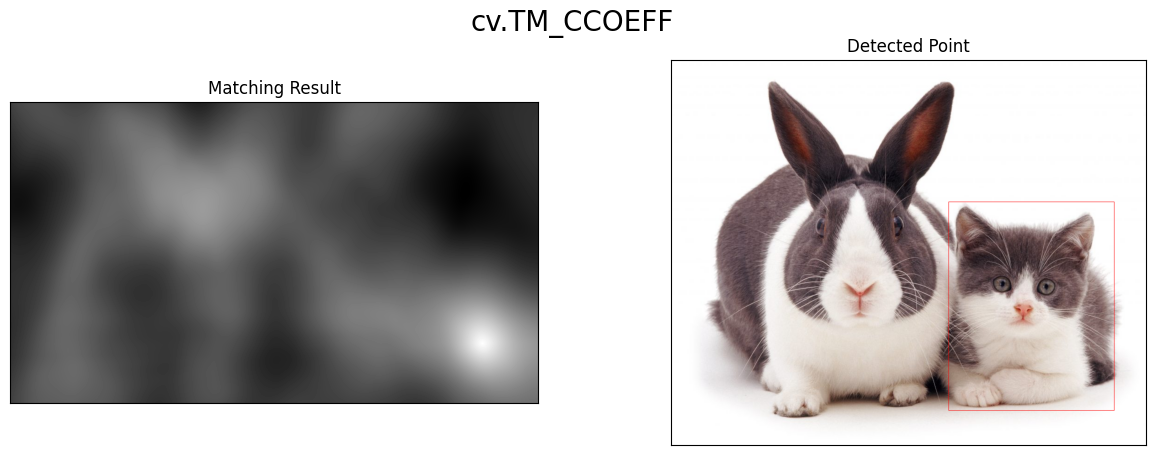

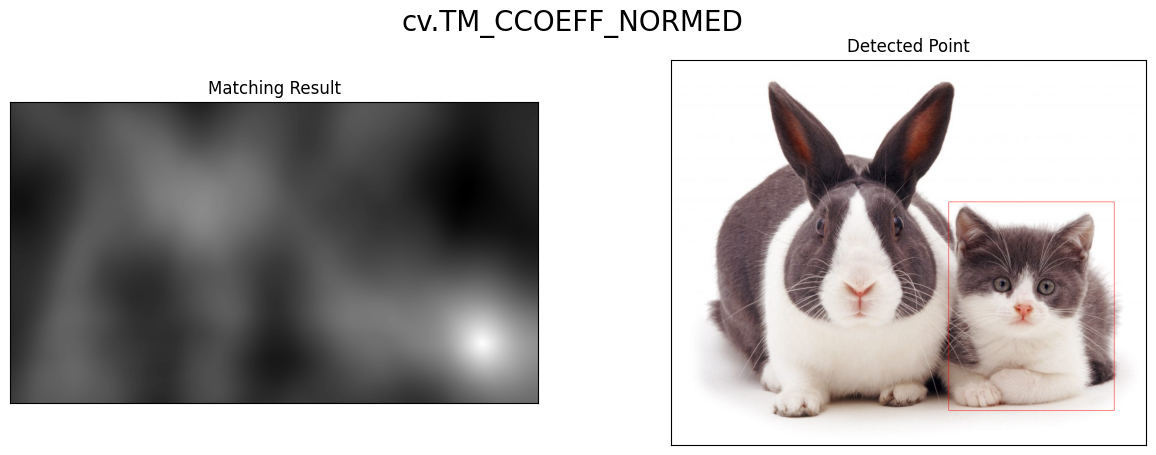

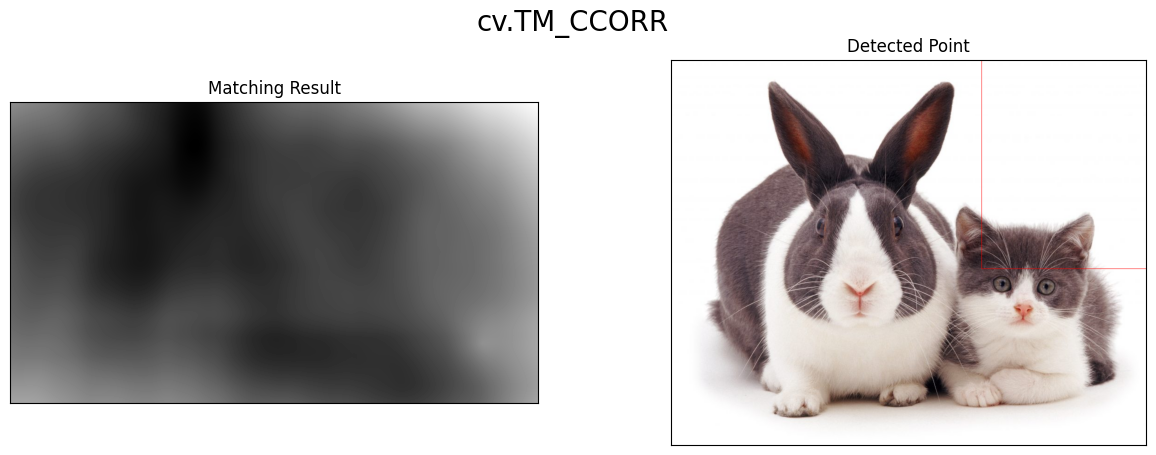

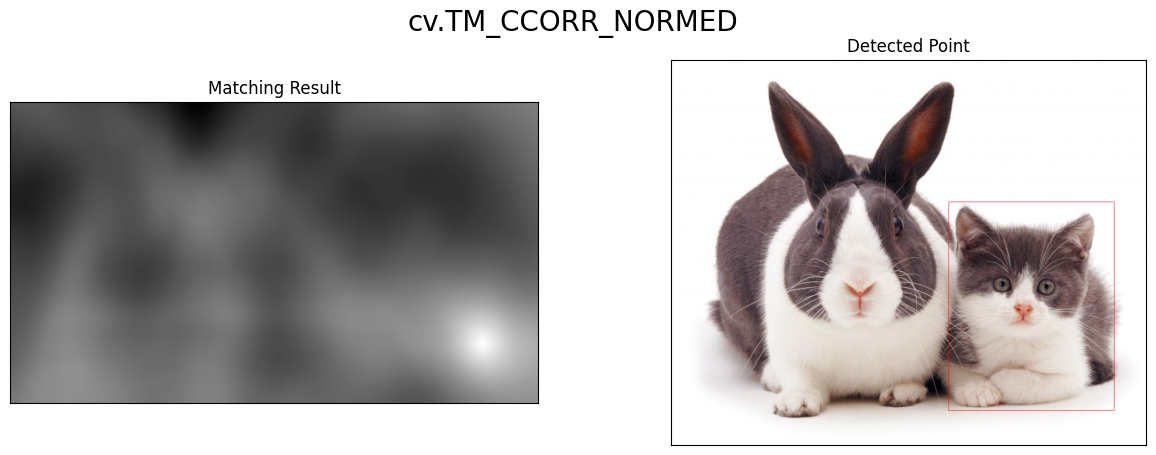

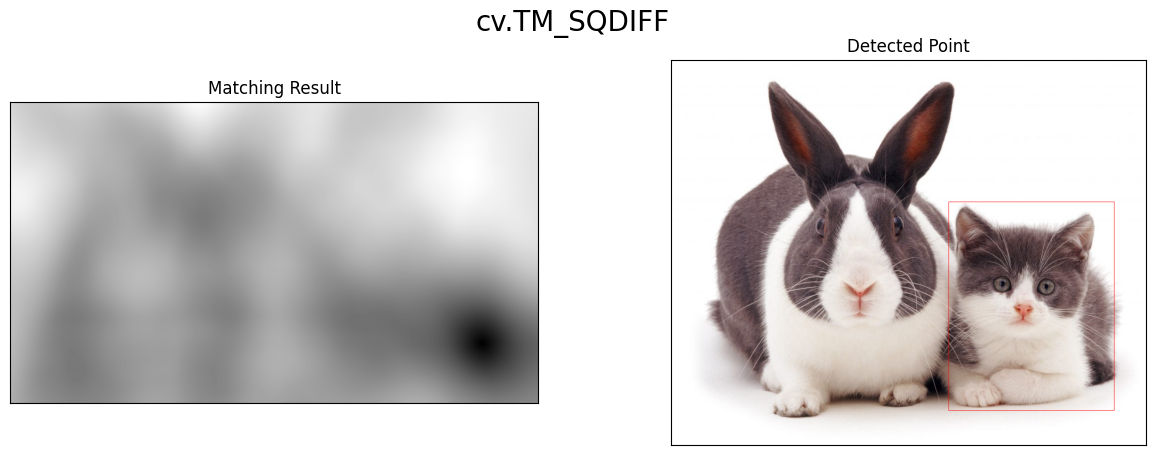

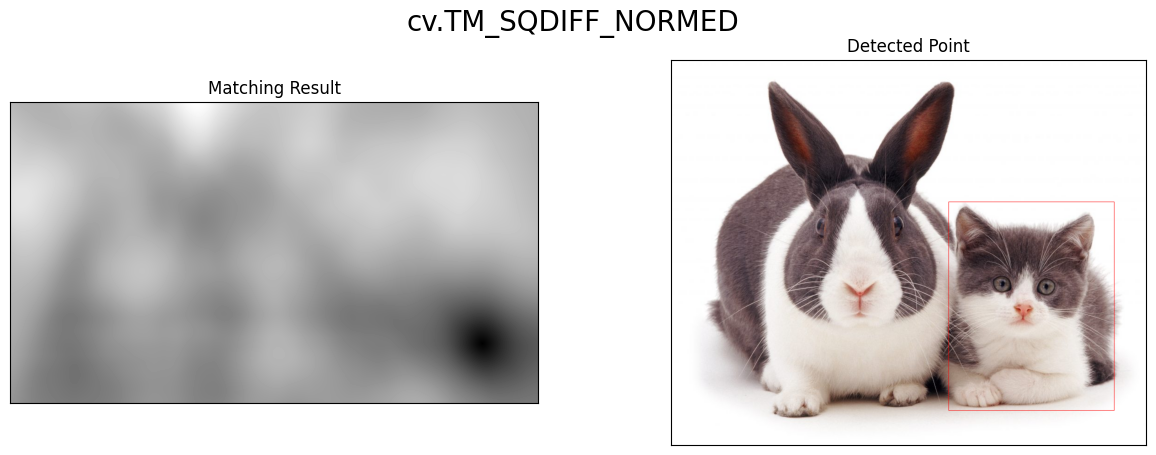

In [8]:
#Nomor 2

# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:


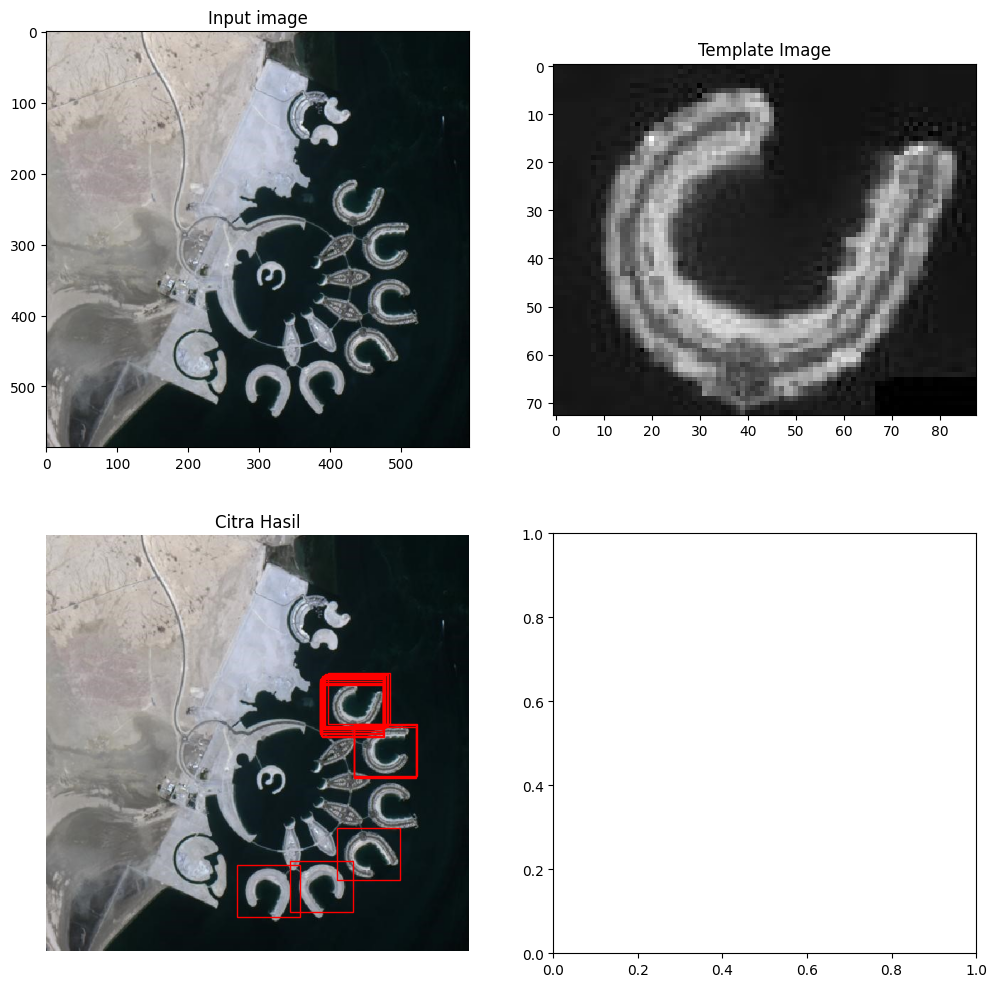

In [23]:
from skimage.io import imread
from skimage.feature import match_template
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from random import randint

# Load citra input
match_img = imread('/content/drive/MyDrive/PCVK/Images/Minggu11/bahrain.jpg')
img_gray = cv.cvtColor(match_img, cv.COLOR_BGR2GRAY)

# Load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/bahrain-template.jpg', 0)

# Dimensi citra
w, h = template.shape[::-1]


# Lakukan template matching dengan variasi rotasi
threshold = 0.45  # Define the threshold
result = match_template(img_gray, template)
locations = np.where(result >= threshold)

# Tampilkan hasil dengan kotak di sekitar objek yang terdeteksi
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))
axarr[0][0].imshow(match_img, cmap=plt.cm.gray)
axarr[0][0].set_title("Input image")
axarr[0][1].imshow(template, cmap=plt.cm.gray)
axarr[0][1].set_title("Template Image")
axarr[1][0].set_title("Citra Hasil")
axarr[1][0].imshow(match_img, cmap=plt.cm.gray)
axarr[1][0].set_axis_off()

height, width = template.shape
colors = ['r']

his_loc = result.shape
tot = 0
for loc in zip(*locations[::-1]):
    totHis = his_loc[0] - loc[0]
    his_loc = loc
    randC = randint(0, (len(colors)-1))
    # Bersihkan gambar noise
    if totHis > 5:
        if tot != totHis:
            tot = totHis
            rect = plt.Rectangle(loc, width, height, edgecolor=colors[randC], facecolor='none', linewidth=1)
            axarr[1][0].add_patch(rect)

plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

In [10]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/car-park.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/car-park.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

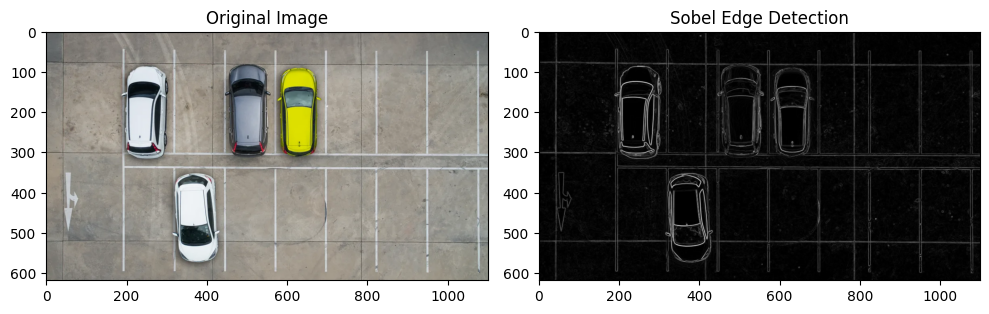

In [11]:
# Metode Sobel
sobel_x = cv.Sobel(imgGray.copy(), cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(imgGray.copy(), cv.CV_64F, 0, 1, ksize=3)

# Menggabungkan gradien Sobel
sobel_combined = np.hypot(sobel_x, sobel_y)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(222)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_combined, cmap='gray')

plt.tight_layout()
plt.show()

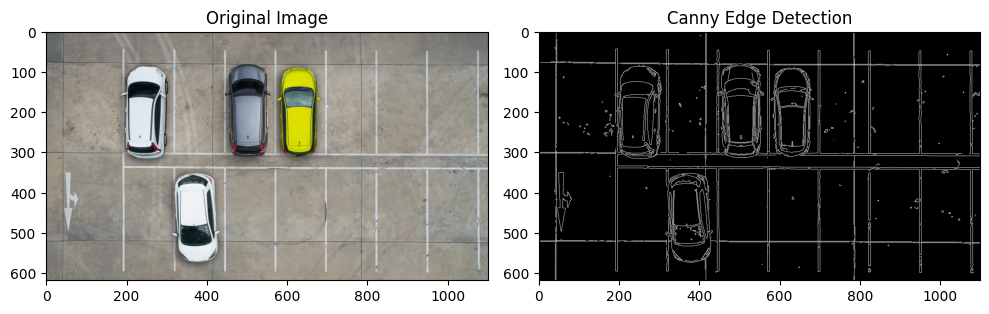

In [12]:
# Canny Edge Detection
edged = cv.Canny(imgGray.copy(), 100, 200)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(222)
plt.title('Canny Edge Detection')
plt.imshow(edged, cmap='gray')

plt.tight_layout()
plt.show()

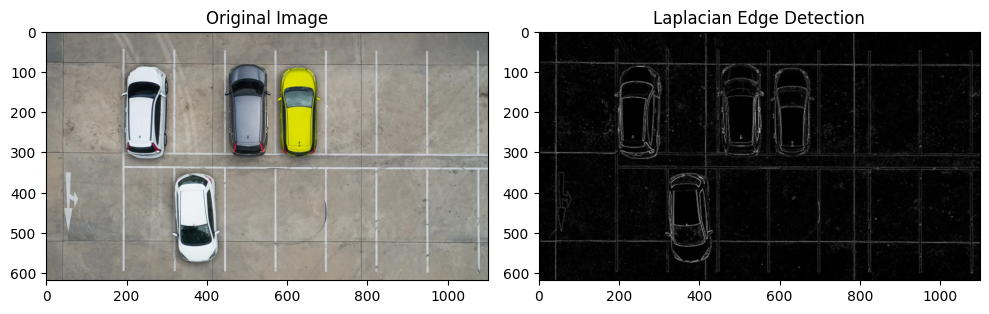

In [13]:
# Laplacian Edge Detection
laplacian = cv.Laplacian(imgGray.copy(), cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

# Menampilkan gambar asli dan hasil deteksi tepi dengan Sobel
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(222)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian_abs, cmap='gray')

plt.tight_layout()
plt.show()


5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:


In [14]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/chess-board.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/chess-board.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

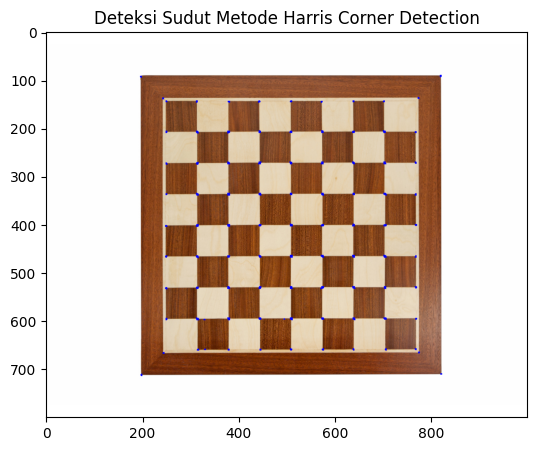

In [15]:
# metode Corner Harris
chrs = cv.cornerHarris(imgGray.copy(), 2, 3, 0.04)

# Dilasi sudut untuk memperjelas tanda sudut
chrs = cv.dilate(chrs, None)

# salin image asli sebelum membuat gambar sudut
imgChrs = img.copy()
# Threshold untuk mengoptimalkan hasil deteksi
imgChrs[chrs > 0.01 * chrs.max()] = [0, 0, 255]

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 5))
plt.title('Deteksi Sudut Metode Harris Corner Detection')
plt.imshow(imgChrs)
plt.show()

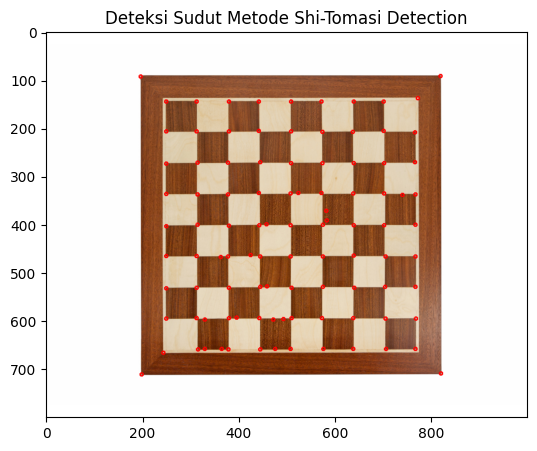

In [16]:
# metode Shi-Tomasi
corners = cv.goodFeaturesToTrack(imgGray.copy(), 100, 0.01, 10)

# Konversi koordinat sudut ke tipe data integer
corners = np.int0(corners)

# salin image asli sebelum membuat gambar sudut
imgShi = img.copy()

# membuat gambar sudut pada citra asli dengan warna biru
for i in corners:
    x, y = i.ravel()
    cv.circle(imgShi, (x, y), 3, (255, 0, 0), 2)

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 5))
plt.title('Deteksi Sudut Metode Shi-Tomasi Detection')
plt.imshow(imgShi)
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:


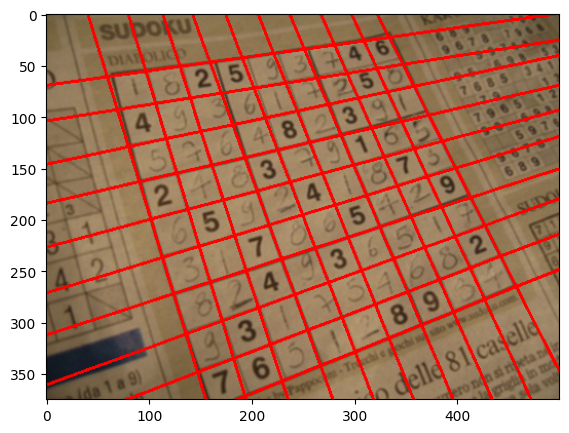

In [17]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11//sudoku.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/sudoku.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Deteksi tepi menggunakan metode Canny
edges = cv.Canny(imgGray, 90, 150, apertureSize=3)

# Dilasi pada tepi untuk menghubungkan komponen yang putus-putus
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Erosi pada tepi untuk menghilangkan noise
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Transformasi Hough untuk mendeteksi garis
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Memeriksa apakah garis ditemukan
if not lines.any():
    print('No lines were found')
    exit()

# Filter garis yang sejajar atau berdekatan
if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    similar_lines = {i: [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i, theta_i = lines[i][0]
            rho_j, theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) * [True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])
    else:
        filtered_lines = lines

    # Menampilkan garis yang telah difilter pada gambar
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Menampilkan gambar input dengan garis yang telah difilter
    plt.figure(figsize=(10, 5))
    plt.imshow(img)

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

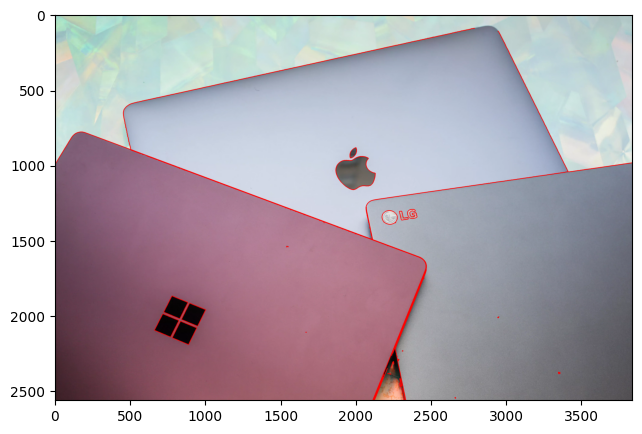

In [18]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/laptop.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/laptop.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Deteksi tepi menggunakan metode Canny dengan threshold 30 dan 200
edged = cv.Canny(imgGray, 30, 200)

# Menemukan kontur pada gambar yang telah dideteksi tepinya
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Menggambar kontur pada gambar asli dengan warna merah
cv.drawContours(img, contours, -1, (255, 0, 0), 4)

# Menyiapkan ukuran figur untuk plot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli dengan kontur yang telah digambar
plt.imshow(img)

**PENGAYAAN MATERI KTP**

1. Siapkan file dataset, pada praktik ini menggunakan KTP milik Mira

2. Muat 2 library berikut sebagai tahapan persiapan

In [19]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/ktpj.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Minggu11/ktpj.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# merubah gambar menjadi greyscale dan RGB
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

114.0 (270, 402)


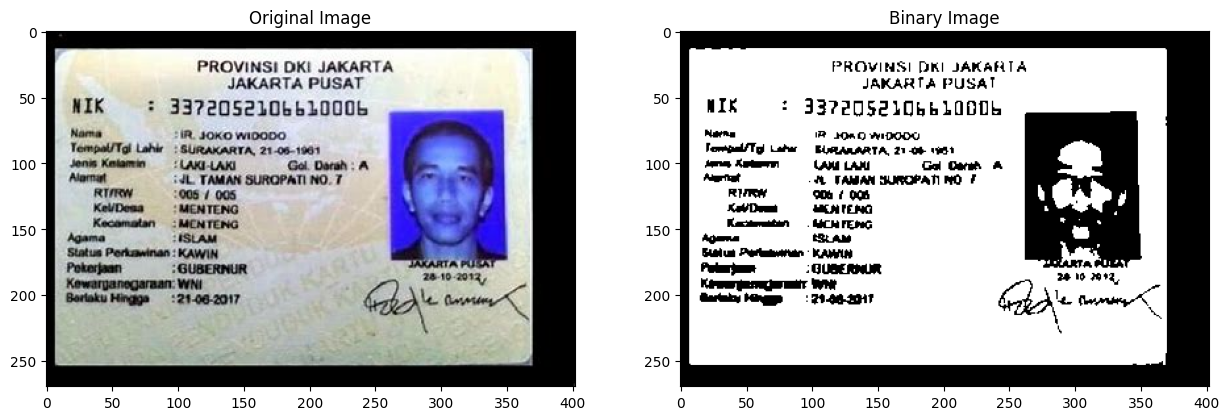

In [20]:
# Filtering
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].set_title("Original Image")
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[1].set_title("Binary Image")
axarr[1].imshow(bw, cmap='gray')
plt.show()

Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

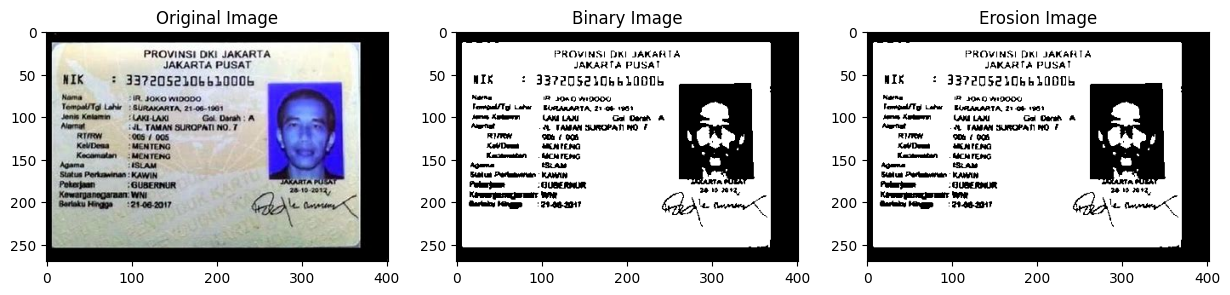

In [21]:
# Terapkan operasi morfologi erosi
erosi = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].set_title("Original Image")
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[1].set_title("Binary Image")
axarr[1].imshow(bw, cmap='gray')
axarr[2].set_title("Erosion Image")
axarr[2].imshow(erosi, cmap='gray')
plt.show()

Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

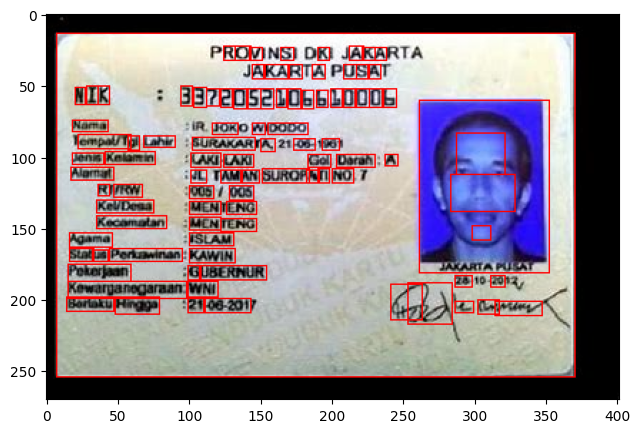

In [22]:
# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))